# Halpha Emitters S-PLUS

In [1]:
import numpy as np
import pandas as pd
import glob
from astropy.table import Table
from sklearn.decomposition import PCA
from sklearn.model_selection import train_test_split
from sklearn.metrics import silhouette_score
from sklearn.model_selection import ParameterGrid
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
import hdbscan
import matplotlib.pyplot as plt
from itertools import combinations
import umap
import seaborn as sns; sns.set()
sns.set_theme(style="ticks")

2025-04-18 22:55:09.231979: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:485] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2025-04-18 22:55:09.300973: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:8454] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2025-04-18 22:55:09.320325: E external/local_xla/xla/stream_executor/cuda/cuda_blas.cc:1452] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2025-04-18 22:55:09.445709: I tensorflow/core/platform/cpu_feature_guard.cc:210] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2025-04-18 22:55:10.443313: W tensorflow/compiler/tf2

In [2]:
# Concatenate all DataFrames into a single DataFrame
combined_df = pd.read_csv("../IGAPs-emitters-wise.csv")
combined_df

,Name,RAJ2000,DEJ2000,GLON,GLAT,SourceID,ePos,Class,pStar,pGalaxy,...,ccf,ex,var,qph,pmRA,e_pmRA,pmDE,e_pmDE,d2M,angDist
0,J194407.42+302330.8,296.030917,30.391885,65.664704,3.196313,470950-3-22952,0.033,-1.0,1.00,0.00,...,0000,0,32nn,AACU,-83.0,104.0,-153.0,110.0,0.071,0.196844
1,J194658.92+300856.6,296.745494,30.149063,65.762646,2.540368,398901-1-7845,0.052,1.0,0.00,1.00,...,hh00,1,63nn,AABU,-82.0,68.0,-5.0,68.0,0.372,1.194323
2,J194853.02+304415.1,297.220898,30.737534,66.478141,2.482665,399404-3-13395,0.065,99.0,0.05,0.94,...,0h00,1,21nn,AAUU,-231.0,55.0,-180.0,55.0,0.788,1.062905
3,J193737.05+291841.3,294.404389,29.311475,64.027520,3.894285,420815-3-7132,0.044,-1.0,1.00,0.00,...,dd00,0,nnnn,AAUU,NaN,NaN,NaN,NaN,0.303,0.296750
4,J193422.27+291439.8,293.592782,29.244383,63.625692,4.481705,420083-3-17125,0.043,99.0,0.00,1.00,...,dd00,0,nnnn,AAUU,NaN,NaN,NaN,NaN,0.367,0.259146
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9809,J194657.47+291706.8,296.739465,29.285215,65.012424,2.111001,626263-3-22491,0.026,-1.0,1.00,0.00,...,00dD,1,31nn,AABB,-192.0,138.0,-15.0,114.0,0.691,0.675858
9810,J194631.32+291451.9,296.630484,29.247751,64.932234,2.174407,364539-1-2795,0.031,-1.0,1.00,0.00,...,0h00,0,000n,AAAC,-358.0,70.0,101.0,71.0,0.052,0.108804
9811,J194725.96+293304.7,296.858158,29.551299,65.294604,2.155432,398934-4-24535,0.038,-1.0,1.00,0.00,...,0hHH,0,31nn,AAUU,68.0,111.0,87.0,114.0,0.132,0.078484
9812,J194912.66+294740.1,297.302738,29.794486,65.699773,1.944719,534182-1-4440,0.018,-1.0,1.00,0.00,...,0000,1,00nn,AABC,8.0,60.0,-83.0,58.0,0.323,0.274081


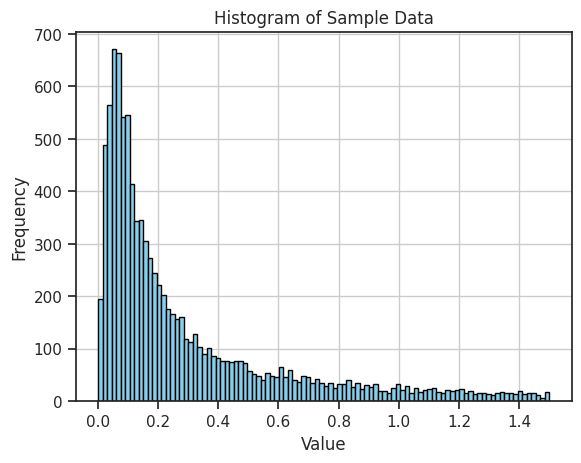

In [3]:
# See the distance of the SPLUS nad WISE source
# Plotting the histogram
plt.hist(combined_df["angDist"], bins=100, color='skyblue', edgecolor='black')  # You can adjust the number of bins as needed
plt.title('Histogram of Sample Data')
plt.xlabel('Value')
plt.ylabel('Frequency')
plt.grid(True)  # Add grid lines for better readability
plt.show()



In [4]:
for columns in combined_df.columns:
    print(columns)

Name
RAJ2000
DEJ2000
GLON
GLAT
SourceID
ePos
Class
pStar
pGalaxy
pNoise
imag
e_imag
imagAB
Elli
Classi
Deblendi
Saturatedi
Vignettedi
Traili
Truncatedi
BadPixi
MJDi
Seeingi
DetIDi
offRAi
offDEi
Hamag
e_Hamag
HamagAB
EllHa
ClassHa
DeblendHa
SaturatedHa
VignettedHa
TrailHa
TruncatedHa
BadPixHa
MJDHa
SeeingHa
DetIDHa
offRAHa
offDEHa
rImag
e_rImag
rImagAB
EllrI
ClassrI
DeblendrI
SaturatedrI
VignettedrI
TrailrI
TruncatedrI
BadPixrI
MJDrI
SeeingrI
DetIDrI
rUmag
e_rUmag
rUmagAB
EllrU
ClassrU
DeblendrU
SaturatedrU
VignettedrU
TrailrU
TruncatedrU
BadPixrU
MJDrU
SeeingrU
DetIDrU
offRArU
offDErU
gmag
e_gmag
gmagAB
Ellg
Classg
Deblendg
Saturatedg
Vignettedg
Trailg
Truncatedg
BadPixg
maskg
MJDg
Seeingg
DetIDg
offRAg
offDEg
Umag
e_Umag
EllU
ClassU
DeblendU
SaturatedU
VignettedU
TrailU
TruncatedU
BadPixU
MJDU
SeeingU
DetIDU
offRAU
offDEU
brightN
deblend
saturated
nBands
errBits
nObsI
nObsU
FieldIDI
FieldIDU
FieldGradeI
FieldGradeU
emitter
variable
SourceID2
imag2
e_imag2
Classi2
Seeingi2
MJDi2
offRAi

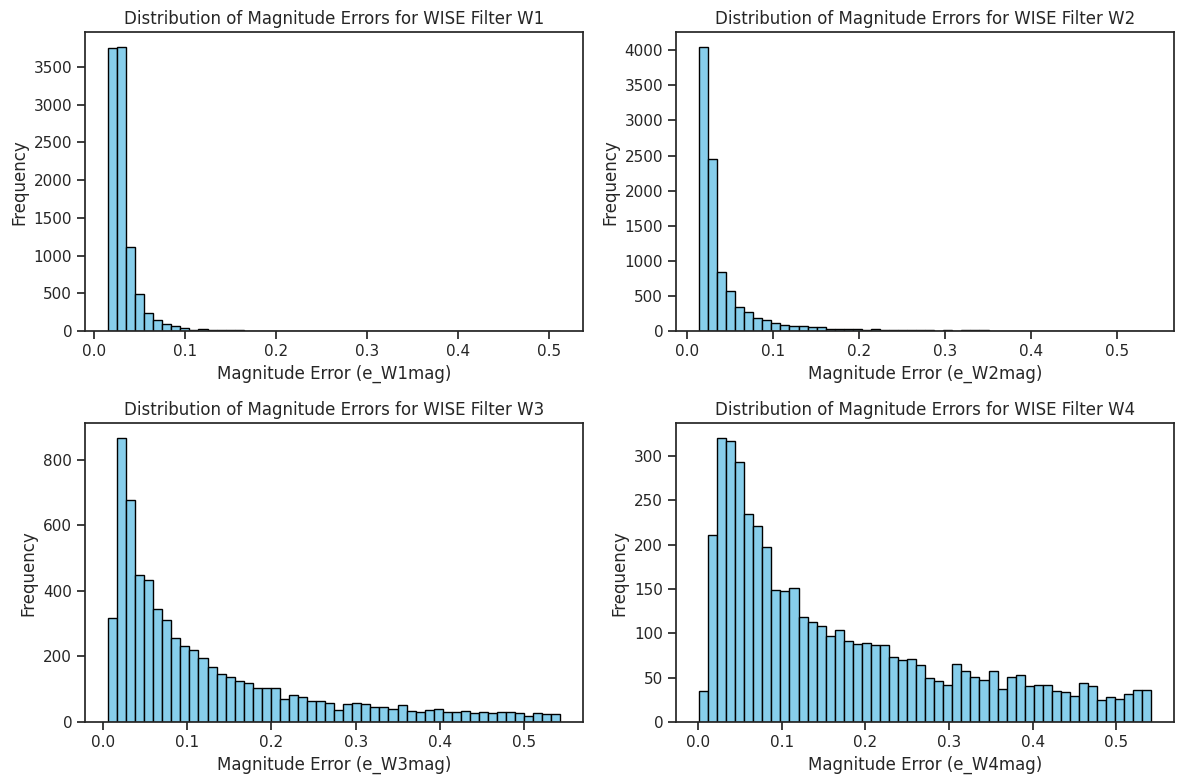

In [5]:
# Extract magnitude errors for WISE filters W1, W2, W3, W4
magnitude_errors_w1 = combined_df["e_W1mag"]
magnitude_errors_w2 = combined_df["e_W2mag"]
magnitude_errors_w3 = combined_df["e_W3mag"]
magnitude_errors_w4 = combined_df["e_W4mag"]

# Create subplots for each histogram
fig, axs = plt.subplots(2, 2, figsize=(12, 8))

# Plot histogram for e_W1mag
axs[0, 0].hist(magnitude_errors_w1, bins=50, color='skyblue', edgecolor='black')
axs[0, 0].set_title('Distribution of Magnitude Errors for WISE Filter W1')
axs[0, 0].set_xlabel('Magnitude Error (e_W1mag)')
axs[0, 0].set_ylabel('Frequency')

# Plot histogram for e_W2mag
axs[0, 1].hist(magnitude_errors_w2, bins=50, color='skyblue', edgecolor='black')
axs[0, 1].set_title('Distribution of Magnitude Errors for WISE Filter W2')
axs[0, 1].set_xlabel('Magnitude Error (e_W2mag)')
axs[0, 1].set_ylabel('Frequency')

# Plot histogram for e_W3mag
axs[1, 0].hist(magnitude_errors_w3, bins=50, color='skyblue', edgecolor='black')
axs[1, 0].set_title('Distribution of Magnitude Errors for WISE Filter W3')
axs[1, 0].set_xlabel('Magnitude Error (e_W3mag)')
axs[1, 0].set_ylabel('Frequency')

# Plot histogram for e_W4mag
axs[1, 1].hist(magnitude_errors_w4, bins=50, color='skyblue', edgecolor='black')
axs[1, 1].set_title('Distribution of Magnitude Errors for WISE Filter W4')
axs[1, 1].set_xlabel('Magnitude Error (e_W4mag)')
axs[1, 1].set_ylabel('Frequency')

# Adjust layout
plt.tight_layout()

# Show the plots
plt.show()

In [6]:
# Máximos errores permitidos (ajustables según necesidades)
max_err_optical = 0.2  # Para bandas ópticas (g, r, i, Hα, U)
max_err_wise = 0.5      # Para WISE (W1, W2)
max_err_2mass = 0.2     # Para 2MASS (J, H, K)

# Máscara de errores para IGAPS (óptico)
m_err_igaps = (
    (combined_df["e_imag"] <= max_err_optical) &
    (combined_df["e_Hamag"] <= max_err_optical) &
    (combined_df["e_rImag"] <= max_err_optical) &
    (combined_df["e_rUmag"] <= max_err_optical) &
    (combined_df["e_gmag"] <= max_err_optical) &
    (combined_df["e_Umag"] <= max_err_optical)  # Opcional si se usa UV
)

# Filtrado de flags de calidad (ej. eliminar saturados)
m_quality_igaps = (
    (combined_df["Saturatedi"] == 0) &
    (combined_df["BadPixi"] == 0) &
    (combined_df["Traili"] == 0)  # Aplica a todas las bandas relevantes
)

In [7]:
# Máscara de errores para WISE y 2MASS
m_err_wise_tmass = (
    (combined_df["e_W1mag"] <= max_err_wise) &
    (combined_df["e_W2mag"] <= max_err_wise) &
    (combined_df["e_Jmag"] <= max_err_2mass) &
    (combined_df["e_Hmag"] <= max_err_2mass) &
    (combined_df["e_Kmag"] <= max_err_2mass)
)


In [8]:
# Combinar todas las máscaras
mask_total = (
    m_err_igaps &
    m_quality_igaps &
    m_err_wise_tmass 
)

# Aplicar la máscara al DataFrame
df_filtered = combined_df[mask_total].copy()
df_filtered

,Name,RAJ2000,DEJ2000,GLON,GLAT,SourceID,ePos,Class,pStar,pGalaxy,...,ccf,ex,var,qph,pmRA,e_pmRA,pmDE,e_pmDE,d2M,angDist
0,J194407.42+302330.8,296.030917,30.391885,65.664704,3.196313,470950-3-22952,0.033,-1.0,1.00,0.00,...,0000,0,32nn,AACU,-83.0,104.0,-153.0,110.0,0.071,0.196844
3,J193737.05+291841.3,294.404389,29.311475,64.027520,3.894285,420815-3-7132,0.044,-1.0,1.00,0.00,...,dd00,0,nnnn,AAUU,NaN,NaN,NaN,NaN,0.303,0.296750
4,J193422.27+291439.8,293.592782,29.244383,63.625692,4.481705,420083-3-17125,0.043,99.0,0.00,1.00,...,dd00,0,nnnn,AAUU,NaN,NaN,NaN,NaN,0.367,0.259146
8,J194006.65+300124.9,295.027722,30.023586,64.915346,3.768859,455814-3-6029,0.048,99.0,1.00,0.00,...,0000,1,00nn,AAUU,-910.0,246.0,550.0,249.0,0.595,0.594496
10,J193331.61+300620.6,293.381688,30.105718,64.296195,5.055353,419728-3-12944,0.037,99.0,0.95,0.05,...,hhh0,0,nnnn,AAUU,NaN,NaN,NaN,NaN,0.306,0.327454
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9809,J194657.47+291706.8,296.739465,29.285215,65.012424,2.111001,626263-3-22491,0.026,-1.0,1.00,0.00,...,00dD,1,31nn,AABB,-192.0,138.0,-15.0,114.0,0.691,0.675858
9810,J194631.32+291451.9,296.630484,29.247751,64.932234,2.174407,364539-1-2795,0.031,-1.0,1.00,0.00,...,0h00,0,000n,AAAC,-358.0,70.0,101.0,71.0,0.052,0.108804
9811,J194725.96+293304.7,296.858158,29.551299,65.294604,2.155432,398934-4-24535,0.038,-1.0,1.00,0.00,...,0hHH,0,31nn,AAUU,68.0,111.0,87.0,114.0,0.132,0.078484
9812,J194912.66+294740.1,297.302738,29.794486,65.699773,1.944719,534182-1-4440,0.018,-1.0,1.00,0.00,...,0000,1,00nn,AABC,8.0,60.0,-83.0,58.0,0.323,0.274081


In [9]:
#Selecting columns
columns = ["rImag",       # Magnitud en banda r (IPHAS)
    "Hamag",       # Magnitud en Hα (filtro estrecho)
    "gmag",        # Magnitud en banda g
    "imag",        # Magnitud en banda i
    "rUmag",       # Magnitud en banda r (UVEX, para variabilidad)
    "Umag",
    "W1mag",       # WISE 3.4 µm
    "W2mag",       # WISE 4.6 µm
    "Jmag",        # 2MASS J (1.25 µm)
    "Hmag",        # 2MASS H (1.65 µm)
    "Kmag"         # 2MASS Ks (2.17 µm)]
          ]

In [10]:
df_mag = df_filtered[columns]
df_mag

,rImag,Hamag,gmag,imag,rUmag,Umag,W1mag,W2mag,Jmag,Hmag,Kmag
0,18.22,17.14,19.71,16.52,18.31,20.88,13.630,13.663,14.553,13.871,13.758
3,16.36,15.79,17.40,15.78,16.22,19.22,13.506,13.750,14.321,13.746,13.652
4,16.94,16.48,17.92,16.43,16.98,19.12,14.919,15.634,15.469,15.229,15.029
8,17.99,17.27,19.35,17.11,18.03,20.28,14.578,14.523,15.759,15.169,14.745
10,17.15,16.30,17.48,16.66,16.70,17.87,14.591,14.878,15.434,15.122,15.035
...,...,...,...,...,...,...,...,...,...,...,...
9809,16.09,15.59,17.30,15.44,16.11,18.81,13.322,13.402,14.219,13.597,13.471
9810,16.51,15.74,18.05,15.47,16.50,19.06,12.160,11.816,13.798,13.217,12.870
9811,15.72,15.32,16.49,15.28,15.61,17.62,13.799,14.147,14.282,13.905,13.793
9812,16.47,15.59,17.95,15.51,16.47,18.86,12.346,12.009,13.996,13.470,13.151


In [14]:
import numpy as np

# Creación de todos los colores no redundantes
df_colors = df_mag.assign(
    # --- Colores Óptico-Óptico (IGAPS) ---
    U_g = lambda x: x["Umag"] - x["gmag"],
    g_r = lambda x: x["gmag"] - x["rImag"],
    r_i = lambda x: x["rImag"] - x["imag"],
    r_Ha = lambda x: x["rImag"] - x["Hamag"],   # Exceso de Hα principal
    i_Ha = lambda x: x["imag"] - x["Hamag"],     # Alternativo para objetos rojos
    
    # --- Colores Óptico-IR (IGAPS + WISE/2MASS) ---
    g_W1 = lambda x: x["gmag"] - x["W1mag"],     # Exceso IR en objetos azules
    r_W2 = lambda x: x["rImag"] - x["W2mag"],    # Emisión óptica vs polvo térmico
    Ha_W1 = lambda x: x["Hamag"] - x["W1mag"],   # Hα vs polvo cálido
    Ha_W2 = lambda x: x["Hamag"] - x["W2mag"],   # Hα vs polvo más frío
    i_K = lambda x: x["imag"] - x["Kmag"],       # Óptico rojo vs IR cercano
    J_r = lambda x: x["Jmag"] - x["rImag"],      # IR vs óptico
    
    # --- Colores IR-IR (WISE + 2MASS) ---
    W1_W2 = lambda x: x["W1mag"] - x["W2mag"],   # Exceso térmico clave
    J_H = lambda x: x["Jmag"] - x["Hmag"],       # Indicador de tipo espectral
    H_K = lambda x: x["Hmag"] - x["Kmag"],       # Exceso en K (polvo/CO)
    W1_J = lambda x: x["W1mag"] - x["Jmag"],     # Polvo vs componente estelar
    H_W2 = lambda x: x["Hmag"] - x["W2mag"],     # Polvo vs componente estelar
    K_W2 = lambda x: x["Kmag"] - x["W2mag"],     # Polvo vs componente estelar
    
    
    # --- Variabilidad ---
    var_r = lambda x: np.abs(x["rImag"] - x["rUmag"])  # Absoluta para evitar negativos
)

# Lista final de features para UMAP/HDBSCAN
features = [
    # Óptico-Óptico
    'U_g', 'g_r', 'r_i', 'r_Ha', 'i_Ha',
    
    # Óptico-IR
    'g_W1', 'r_W2', 'Ha_W1', 'Ha_W2', 'i_K', 'J_r',
    
    # IR-IR
    'W1_W2', 'J_H', 'H_K', 'W1_J', "H_W2", "K_W2",
    
    # Variabilidad
    'var_r'
]

# Filtrar NaNs y crear dataset final
df_analysis = df_colors[features].dropna()

# Verificación rápida
print(f"Columnas finales: {df_analysis.columns.tolist()}")
print(f"Tamaño del dataset: {df_analysis.shape}")

Columnas finales: ['U_g', 'g_r', 'r_i', 'r_Ha', 'i_Ha', 'g_W1', 'r_W2', 'Ha_W1', 'Ha_W2', 'i_K', 'J_r', 'W1_W2', 'J_H', 'H_K', 'W1_J', 'H_W2', 'K_W2', 'var_r']
Tamaño del dataset: (5291, 18)


In [15]:
print(df_analysis.head())

     U_g   g_r   r_i  r_Ha  i_Ha   g_W1   r_W2  Ha_W1  Ha_W2    i_K    J_r  \
0   1.17  1.49  1.70  1.08 -0.62  6.080  4.557  3.510  3.477  2.762 -3.667   
3   1.82  1.04  0.58  0.57 -0.01  3.894  2.610  2.284  2.040  2.128 -2.039   
4   1.20  0.98  0.51  0.46 -0.05  3.001  1.306  1.561  0.846  1.401 -1.471   
8   0.93  1.36  0.88  0.72 -0.16  4.772  3.467  2.692  2.747  2.365 -2.231   
10  0.39  0.33  0.49  0.85  0.36  2.889  2.272  1.709  1.422  1.625 -1.716   

    W1_W2    J_H    H_K   W1_J   H_W2   K_W2  var_r  
0  -0.033  0.682  0.113 -0.923  0.208  0.095   0.09  
3  -0.244  0.575  0.094 -0.815 -0.004 -0.098   0.14  
4  -0.715  0.240  0.200 -0.550 -0.405 -0.605   0.04  
8   0.055  0.590  0.424 -1.181  0.646  0.222   0.04  
10 -0.287  0.312  0.087 -0.843  0.244  0.157   0.45  


In [16]:
df_analysis

,U_g,g_r,r_i,r_Ha,i_Ha,g_W1,r_W2,Ha_W1,Ha_W2,i_K,J_r,W1_W2,J_H,H_K,W1_J,H_W2,K_W2,var_r
0,1.17,1.49,1.70,1.08,-0.62,6.080,4.557,3.510,3.477,2.762,-3.667,-0.033,0.682,0.113,-0.923,0.208,0.095,0.09
3,1.82,1.04,0.58,0.57,-0.01,3.894,2.610,2.284,2.040,2.128,-2.039,-0.244,0.575,0.094,-0.815,-0.004,-0.098,0.14
4,1.20,0.98,0.51,0.46,-0.05,3.001,1.306,1.561,0.846,1.401,-1.471,-0.715,0.240,0.200,-0.550,-0.405,-0.605,0.04
8,0.93,1.36,0.88,0.72,-0.16,4.772,3.467,2.692,2.747,2.365,-2.231,0.055,0.590,0.424,-1.181,0.646,0.222,0.04
10,0.39,0.33,0.49,0.85,0.36,2.889,2.272,1.709,1.422,1.625,-1.716,-0.287,0.312,0.087,-0.843,0.244,0.157,0.45
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9809,1.51,1.21,0.65,0.50,-0.15,3.978,2.688,2.268,2.188,1.969,-1.871,-0.080,0.622,0.126,-0.897,0.195,0.069,0.02
9810,1.01,1.54,1.04,0.77,-0.27,5.890,4.694,3.580,3.924,2.600,-2.712,0.344,0.581,0.347,-1.638,1.401,1.054,0.01
9811,1.13,0.77,0.44,0.40,-0.04,2.691,1.573,1.521,1.173,1.487,-1.438,-0.348,0.377,0.112,-0.483,-0.242,-0.354,0.11
9812,0.91,1.48,0.96,0.88,-0.08,5.604,4.461,3.244,3.581,2.359,-2.474,0.337,0.526,0.319,-1.650,1.461,1.142,0.00


### Creating the colors 

***Making the color using some WISE filters***

# Reduction dimensionality

## UMAP 

Given that there are 66 variables, we use UMAP. I think UMAP is the best option because these variables are probably not linearly correlated. [UMAP](https://umap-learn.readthedocs.io/en/latest/) (Uniform Manifold Approximation and Projection) is a dimensionality reduction technique commonly used for visualizing high-dimensional data in lower-dimensional spaces. If you have 66 variables and suspect they are not linearly correlated, UMAP could be a suitable method for exploring the structure of your data in a lower-dimensional space while preserving non-linear relationships. However, the effectiveness of UMAP depends on various factors, including the nature of your data and the specific goals of your analysis. It's always a good idea to experiment with different techniques and evaluate their performance based on your data and objectives.

In [17]:
# Standarized the data
X_stand = StandardScaler().fit_transform(df_colors)

#### Try cross-validation 

To perform cross-validation for choosing the optimal number of components in UMAP.

In [18]:
# Split data into training and validation sets
X_train, X_val = train_test_split(X_stand, test_size=0.2, random_state=42)

In [19]:
# Define a range of number of components to try
num_components_range = [2, 3, 4, 5, 10, 20, 50]
n_neighbors_range = [5, 10, 20, 50, 100]

best_num_components = None
best_n_neighbors = None
best_silhouette_score = -1  # Initialize with a low value

In [20]:
# Loop over different numbers of components and neighbors
for num_components in num_components_range:
    for n_neighbors in n_neighbors_range:
        # Fit UMAP model
        reducer_ = umap.UMAP(n_neighbors=n_neighbors, n_components=num_components, random_state=42)
        X_train_trans = reducer_.fit_transform(X_train)

        # Cluster the transformed data using KMeans
        kmeans = KMeans(n_clusters=num_components, random_state=42)
        labels = kmeans.fit_predict(X_train_trans)

        # Evaluate performance on validation set using Silhouette Score
        silhouette = silhouette_score(X_train_trans, labels, random_state=42)
        print(f"Number of components: {num_components}, Number of neighbors: {n_neighbors}, Silhouette Score: {silhouette}")

        # Update best parameters if necessary
        if silhouette > best_silhouette_score:
            best_silhouette_score = silhouette
            best_num_components = num_components
            best_n_neighbors = n_neighbors
            best_labels = labels

/home/luis/anaconda3/envs/myenv/lib/python3.12/site-packages/umap/umap_.py:1945: UserWarning: n_jobs value 1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(f"n_jobs value {self.n_jobs} overridden to 1 by setting random_state. Use no seed for parallelism.")


Number of components: 2, Number of neighbors: 5, Silhouette Score: 0.471166729927063


/home/luis/anaconda3/envs/myenv/lib/python3.12/site-packages/umap/umap_.py:1945: UserWarning: n_jobs value 1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(f"n_jobs value {self.n_jobs} overridden to 1 by setting random_state. Use no seed for parallelism.")


Number of components: 2, Number of neighbors: 10, Silhouette Score: 0.43397316336631775


/home/luis/anaconda3/envs/myenv/lib/python3.12/site-packages/umap/umap_.py:1945: UserWarning: n_jobs value 1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(f"n_jobs value {self.n_jobs} overridden to 1 by setting random_state. Use no seed for parallelism.")


Number of components: 2, Number of neighbors: 20, Silhouette Score: 0.4159102737903595


/home/luis/anaconda3/envs/myenv/lib/python3.12/site-packages/umap/umap_.py:1945: UserWarning: n_jobs value 1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(f"n_jobs value {self.n_jobs} overridden to 1 by setting random_state. Use no seed for parallelism.")


Number of components: 2, Number of neighbors: 50, Silhouette Score: 0.41948971152305603


/home/luis/anaconda3/envs/myenv/lib/python3.12/site-packages/umap/umap_.py:1945: UserWarning: n_jobs value 1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(f"n_jobs value {self.n_jobs} overridden to 1 by setting random_state. Use no seed for parallelism.")


Number of components: 2, Number of neighbors: 100, Silhouette Score: 0.41935819387435913


/home/luis/anaconda3/envs/myenv/lib/python3.12/site-packages/umap/umap_.py:1945: UserWarning: n_jobs value 1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(f"n_jobs value {self.n_jobs} overridden to 1 by setting random_state. Use no seed for parallelism.")


Number of components: 3, Number of neighbors: 5, Silhouette Score: 0.528039813041687


/home/luis/anaconda3/envs/myenv/lib/python3.12/site-packages/umap/umap_.py:1945: UserWarning: n_jobs value 1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(f"n_jobs value {self.n_jobs} overridden to 1 by setting random_state. Use no seed for parallelism.")


Number of components: 3, Number of neighbors: 10, Silhouette Score: 0.5323976874351501


/home/luis/anaconda3/envs/myenv/lib/python3.12/site-packages/umap/umap_.py:1945: UserWarning: n_jobs value 1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(f"n_jobs value {self.n_jobs} overridden to 1 by setting random_state. Use no seed for parallelism.")


Number of components: 3, Number of neighbors: 20, Silhouette Score: 0.5022891759872437


/home/luis/anaconda3/envs/myenv/lib/python3.12/site-packages/umap/umap_.py:1945: UserWarning: n_jobs value 1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(f"n_jobs value {self.n_jobs} overridden to 1 by setting random_state. Use no seed for parallelism.")


Number of components: 3, Number of neighbors: 50, Silhouette Score: 0.47767174243927


/home/luis/anaconda3/envs/myenv/lib/python3.12/site-packages/umap/umap_.py:1945: UserWarning: n_jobs value 1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(f"n_jobs value {self.n_jobs} overridden to 1 by setting random_state. Use no seed for parallelism.")


Number of components: 3, Number of neighbors: 100, Silhouette Score: 0.4778308570384979


/home/luis/anaconda3/envs/myenv/lib/python3.12/site-packages/umap/umap_.py:1945: UserWarning: n_jobs value 1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(f"n_jobs value {self.n_jobs} overridden to 1 by setting random_state. Use no seed for parallelism.")


Number of components: 4, Number of neighbors: 5, Silhouette Score: 0.4724780321121216


/home/luis/anaconda3/envs/myenv/lib/python3.12/site-packages/umap/umap_.py:1945: UserWarning: n_jobs value 1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(f"n_jobs value {self.n_jobs} overridden to 1 by setting random_state. Use no seed for parallelism.")


Number of components: 4, Number of neighbors: 10, Silhouette Score: 0.430929034948349


/home/luis/anaconda3/envs/myenv/lib/python3.12/site-packages/umap/umap_.py:1945: UserWarning: n_jobs value 1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(f"n_jobs value {self.n_jobs} overridden to 1 by setting random_state. Use no seed for parallelism.")


Number of components: 4, Number of neighbors: 20, Silhouette Score: 0.4184029996395111


/home/luis/anaconda3/envs/myenv/lib/python3.12/site-packages/umap/umap_.py:1945: UserWarning: n_jobs value 1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(f"n_jobs value {self.n_jobs} overridden to 1 by setting random_state. Use no seed for parallelism.")


Number of components: 4, Number of neighbors: 50, Silhouette Score: 0.4197915196418762


/home/luis/anaconda3/envs/myenv/lib/python3.12/site-packages/umap/umap_.py:1945: UserWarning: n_jobs value 1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(f"n_jobs value {self.n_jobs} overridden to 1 by setting random_state. Use no seed for parallelism.")


Number of components: 4, Number of neighbors: 100, Silhouette Score: 0.418961763381958


/home/luis/anaconda3/envs/myenv/lib/python3.12/site-packages/umap/umap_.py:1945: UserWarning: n_jobs value 1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(f"n_jobs value {self.n_jobs} overridden to 1 by setting random_state. Use no seed for parallelism.")


Number of components: 5, Number of neighbors: 5, Silhouette Score: 0.42052456736564636


/home/luis/anaconda3/envs/myenv/lib/python3.12/site-packages/umap/umap_.py:1945: UserWarning: n_jobs value 1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(f"n_jobs value {self.n_jobs} overridden to 1 by setting random_state. Use no seed for parallelism.")


Number of components: 5, Number of neighbors: 10, Silhouette Score: 0.3926622271537781


/home/luis/anaconda3/envs/myenv/lib/python3.12/site-packages/umap/umap_.py:1945: UserWarning: n_jobs value 1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(f"n_jobs value {self.n_jobs} overridden to 1 by setting random_state. Use no seed for parallelism.")


Number of components: 5, Number of neighbors: 20, Silhouette Score: 0.4156818091869354


/home/luis/anaconda3/envs/myenv/lib/python3.12/site-packages/umap/umap_.py:1945: UserWarning: n_jobs value 1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(f"n_jobs value {self.n_jobs} overridden to 1 by setting random_state. Use no seed for parallelism.")


Number of components: 5, Number of neighbors: 50, Silhouette Score: 0.4143202006816864


/home/luis/anaconda3/envs/myenv/lib/python3.12/site-packages/umap/umap_.py:1945: UserWarning: n_jobs value 1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(f"n_jobs value {self.n_jobs} overridden to 1 by setting random_state. Use no seed for parallelism.")


Number of components: 5, Number of neighbors: 100, Silhouette Score: 0.4080531895160675


/home/luis/anaconda3/envs/myenv/lib/python3.12/site-packages/umap/umap_.py:1945: UserWarning: n_jobs value 1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(f"n_jobs value {self.n_jobs} overridden to 1 by setting random_state. Use no seed for parallelism.")


Number of components: 10, Number of neighbors: 5, Silhouette Score: 0.35576876997947693


/home/luis/anaconda3/envs/myenv/lib/python3.12/site-packages/umap/umap_.py:1945: UserWarning: n_jobs value 1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(f"n_jobs value {self.n_jobs} overridden to 1 by setting random_state. Use no seed for parallelism.")


Number of components: 10, Number of neighbors: 10, Silhouette Score: 0.34551993012428284


/home/luis/anaconda3/envs/myenv/lib/python3.12/site-packages/umap/umap_.py:1945: UserWarning: n_jobs value 1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(f"n_jobs value {self.n_jobs} overridden to 1 by setting random_state. Use no seed for parallelism.")


Number of components: 10, Number of neighbors: 20, Silhouette Score: 0.37010860443115234


/home/luis/anaconda3/envs/myenv/lib/python3.12/site-packages/umap/umap_.py:1945: UserWarning: n_jobs value 1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(f"n_jobs value {self.n_jobs} overridden to 1 by setting random_state. Use no seed for parallelism.")


Number of components: 10, Number of neighbors: 50, Silhouette Score: 0.36581432819366455


/home/luis/anaconda3/envs/myenv/lib/python3.12/site-packages/umap/umap_.py:1945: UserWarning: n_jobs value 1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(f"n_jobs value {self.n_jobs} overridden to 1 by setting random_state. Use no seed for parallelism.")


Number of components: 10, Number of neighbors: 100, Silhouette Score: 0.3559666574001312


/home/luis/anaconda3/envs/myenv/lib/python3.12/site-packages/umap/umap_.py:1945: UserWarning: n_jobs value 1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(f"n_jobs value {self.n_jobs} overridden to 1 by setting random_state. Use no seed for parallelism.")


Number of components: 20, Number of neighbors: 5, Silhouette Score: 0.35228464007377625


/home/luis/anaconda3/envs/myenv/lib/python3.12/site-packages/umap/umap_.py:1945: UserWarning: n_jobs value 1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(f"n_jobs value {self.n_jobs} overridden to 1 by setting random_state. Use no seed for parallelism.")


Number of components: 20, Number of neighbors: 10, Silhouette Score: 0.3561164438724518


/home/luis/anaconda3/envs/myenv/lib/python3.12/site-packages/umap/umap_.py:1945: UserWarning: n_jobs value 1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(f"n_jobs value {self.n_jobs} overridden to 1 by setting random_state. Use no seed for parallelism.")


Number of components: 20, Number of neighbors: 20, Silhouette Score: 0.34923863410949707


/home/luis/anaconda3/envs/myenv/lib/python3.12/site-packages/umap/umap_.py:1945: UserWarning: n_jobs value 1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(f"n_jobs value {self.n_jobs} overridden to 1 by setting random_state. Use no seed for parallelism.")


Number of components: 20, Number of neighbors: 50, Silhouette Score: 0.35189247131347656


/home/luis/anaconda3/envs/myenv/lib/python3.12/site-packages/umap/umap_.py:1945: UserWarning: n_jobs value 1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(f"n_jobs value {self.n_jobs} overridden to 1 by setting random_state. Use no seed for parallelism.")


Number of components: 20, Number of neighbors: 100, Silhouette Score: 0.36776629090309143


/home/luis/anaconda3/envs/myenv/lib/python3.12/site-packages/umap/umap_.py:1945: UserWarning: n_jobs value 1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(f"n_jobs value {self.n_jobs} overridden to 1 by setting random_state. Use no seed for parallelism.")


Number of components: 50, Number of neighbors: 5, Silhouette Score: 0.3821296691894531


/home/luis/anaconda3/envs/myenv/lib/python3.12/site-packages/umap/umap_.py:1945: UserWarning: n_jobs value 1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(f"n_jobs value {self.n_jobs} overridden to 1 by setting random_state. Use no seed for parallelism.")


Number of components: 50, Number of neighbors: 10, Silhouette Score: 0.35201558470726013


/home/luis/anaconda3/envs/myenv/lib/python3.12/site-packages/umap/umap_.py:1945: UserWarning: n_jobs value 1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(f"n_jobs value {self.n_jobs} overridden to 1 by setting random_state. Use no seed for parallelism.")


Number of components: 50, Number of neighbors: 20, Silhouette Score: 0.3531394302845001


/home/luis/anaconda3/envs/myenv/lib/python3.12/site-packages/umap/umap_.py:1945: UserWarning: n_jobs value 1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(f"n_jobs value {self.n_jobs} overridden to 1 by setting random_state. Use no seed for parallelism.")


Number of components: 50, Number of neighbors: 50, Silhouette Score: 0.35400155186653137


/home/luis/anaconda3/envs/myenv/lib/python3.12/site-packages/umap/umap_.py:1945: UserWarning: n_jobs value 1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(f"n_jobs value {self.n_jobs} overridden to 1 by setting random_state. Use no seed for parallelism.")


Number of components: 50, Number of neighbors: 100, Silhouette Score: 0.3345562517642975


In [21]:
# Output best parameters and corresponding silhouette score
print(f"Best number of components: {best_num_components}, Best number of neighbors: {best_n_neighbors}, Best Silhouette Score: {best_silhouette_score}")

Best number of components: 3, Best number of neighbors: 10, Best Silhouette Score: 0.5323976874351501


#### Try UMAP

In [28]:
num_components = 3
reducer = umap.UMAP(n_neighbors=10, # default 15, The size of local neighborhood (in terms of number of neighboring sample points) used for manifold approximation.
                    n_components=num_components,  # min_samples=15, min_cluster_size=60
                     min_dist=0.2, 
                    metric='cosine',       # Mejor para datos fotométricos
                    random_state=42)
X_trans = reducer.fit_transform(X_stand)

/home/luis/anaconda3/envs/myenv/lib/python3.12/site-packages/umap/umap_.py:1945: UserWarning: n_jobs value 1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(f"n_jobs value {self.n_jobs} overridden to 1 by setting random_state. Use no seed for parallelism.")


Visualize the cumulative explained variance ratio:

In [29]:
# Calculate the variance of the original data points in the reduced space
original_variance = np.var(X_trans, axis=0)

# Calculate the explained variance ratio
explained_variance_ratio = original_variance / np.sum(original_variance)

# Calculate the cumulative explained variance ratio
cumulative_explained_variance_ratio = np.cumsum(explained_variance_ratio)

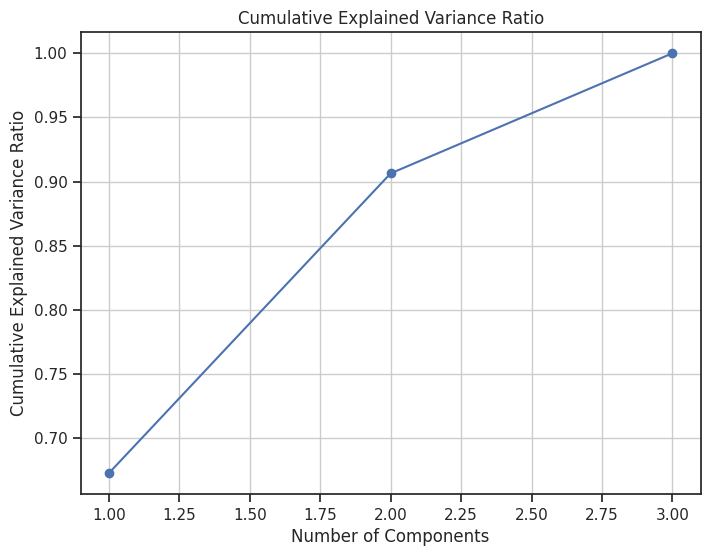

In [30]:
# Plot the cumulative explained variance ratio
plt.figure(figsize=(8, 6))
plt.plot(np.arange(1, len(cumulative_explained_variance_ratio) + 1), cumulative_explained_variance_ratio, marker='o', linestyle='-')
plt.xlabel('Number of Components')
plt.ylabel('Cumulative Explained Variance Ratio')
plt.title('Cumulative Explained Variance Ratio')
plt.grid(True)
plt.show()

In [31]:
#umap_df = pd.DataFrame(X_trans, columns = ["PC1", "PC2", "PC3"])
# Create a DataFrame for PCA results
umap_columns = [f'PC{i}' for i in range(1, num_components + 1)]
umap_df = pd.DataFrame(data=X_trans, columns=umap_columns)
umap_df

,PC1,PC2,PC3
0,1.484631,1.568673,4.605864
1,6.588462,2.380211,2.946511
2,5.995028,1.982311,2.129001
3,3.938901,3.128682,1.434969
4,7.532573,2.549290,1.110527
...,...,...,...
5286,7.244022,2.662669,3.180351
5287,1.609970,5.303512,4.785073
5288,7.759397,2.809652,2.930034
5289,6.709561,3.818258,1.374864


/tmp/ipykernel_606612/824404214.py:5: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  cmap=plt.cm.get_cmap('Accent', 10))


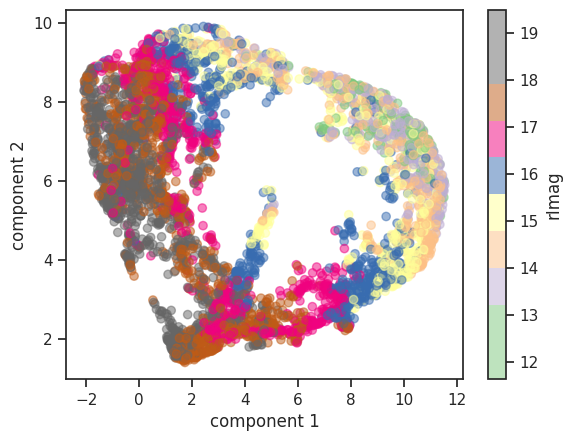

In [32]:
# Assuming umap_df is your DataFrame containing UMAP components and g_PStotal column
plt.scatter(umap_df["PC1"], umap_df["PC2"],
            c=df_filtered["rImag"],  # Set color based on the values of "g_PStotal"
            alpha=0.5,
            cmap=plt.cm.get_cmap('Accent', 10))
plt.xlabel('component 1')
plt.ylabel('component 2')
plt.colorbar(label='rImag')  # Set the label of the color bar to 'g_PStotal'
plt.show()

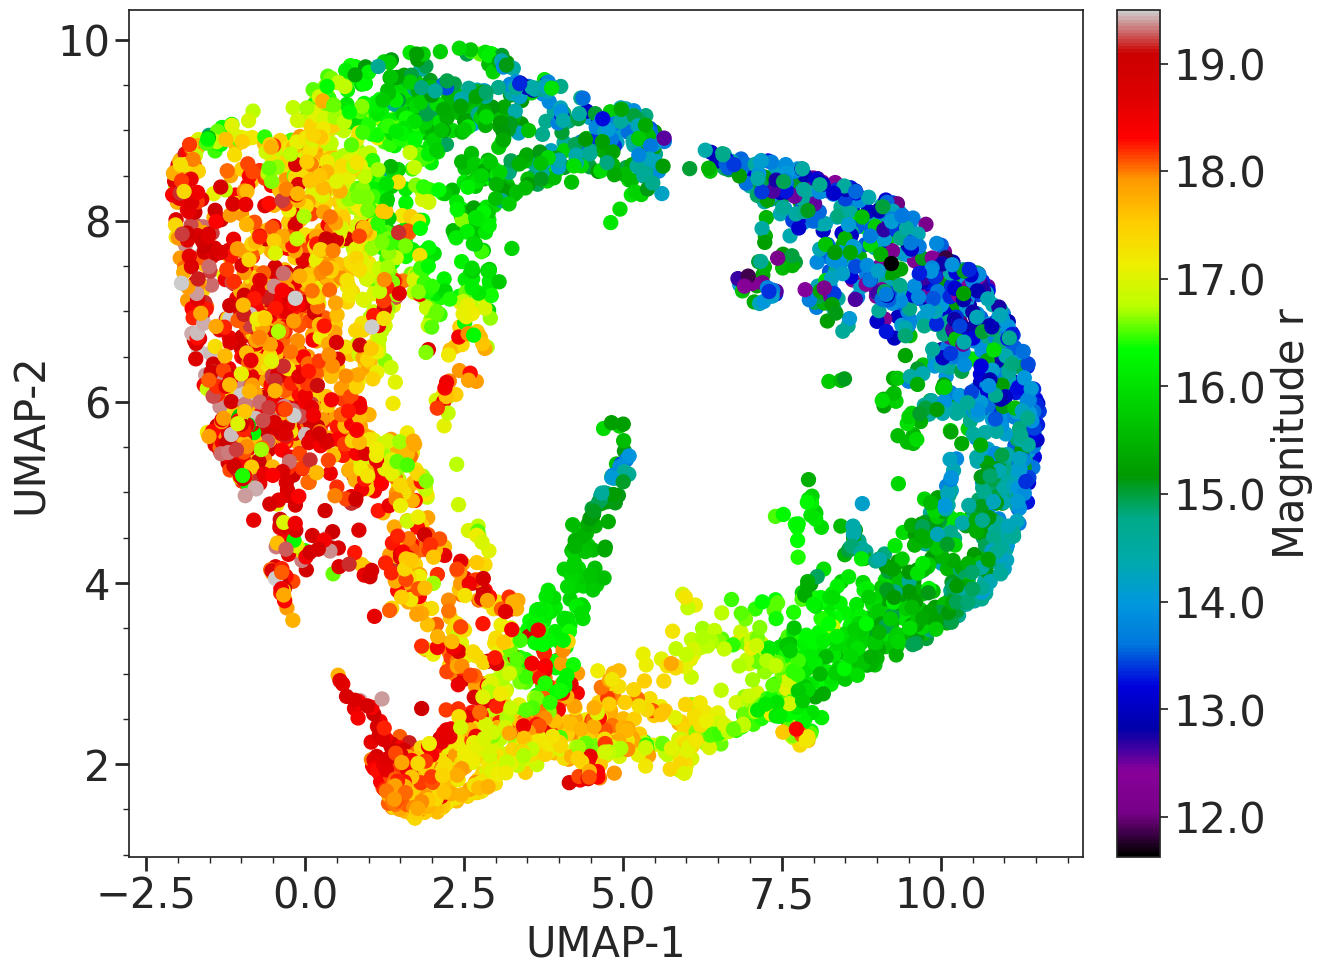

In [33]:
from matplotlib.ticker import MultipleLocator, NullFormatter

# Plotting
with sns.axes_style("ticks"):
    fig, ax = plt.subplots(figsize=(15, 11))
    plt.xlabel("UMAP-1", fontsize=30)
    plt.ylabel("UMAP-2", fontsize=30)
    plt.tick_params(axis='x', labelsize=30, width=2, length=10)  # Adjusting width of tick marks
    plt.tick_params(axis='y', labelsize=30, width=2, length=10)  # Adjusting width of tick marks

    # Create a scatter plot
    sc = ax.scatter(umap_df["PC1"], umap_df["PC2"], c=df_filtered["rImag"], cmap="nipy_spectral", s=100)
    
    # Add minor tick locators without showing the minor ticks
    ax.xaxis.set_minor_locator(MultipleLocator(0.5))
    ax.yaxis.set_minor_locator(MultipleLocator(0.5))
    ax.xaxis.set_minor_formatter(NullFormatter())
    ax.yaxis.set_minor_formatter(NullFormatter())

    # Add a colorbar with improved visibility
    cbar = plt.colorbar(sc, ax=ax, orientation='vertical', pad=0.03, format='%.1f')
    cbar.set_label("Magnitude r", fontsize=30)  # Provide a label for the colorbar
    cbar.ax.tick_params(labelsize=30)  # Adjust the size of the tick labels

#plt.savefig("../Figs/umap_splus_wise.pdf")

## HDBSCAN 

#### Find the best parameters 

To find the best min_samples and min_cluster_size parameters for HDBSCAN, you typically perform a grid search over a range of values and evaluate the clustering performance using a metric such as silhouette score or another relevant metric.

Here's a general approach you can follow:

    Define a grid of parameters to search over for min_samples and min_cluster_size.
    For each combination of parameters:
        Fit HDBSCAN to your data.
        Evaluate the clustering performance using a metric such as silhouette score.
    Select the parameters that result in the highest clustering performance according to your chosen metric.

Here's how you can perform this grid search:

In [34]:

# Define the range of values for min_samples and min_cluster_size
min_samples_range = [5, 10, 15, 20, 25, 30, 35]  # Adjust as needed
min_cluster_size_range = [40, 50, 60, 80, 100, 120, 150]  # Adjust as needed

In [35]:
best_score = -1
best_params = {}


In [36]:
for min_samples in min_samples_range:
    for min_cluster_size in min_cluster_size_range:
        # Fit HDBSCAN with the current parameters
        clusterer_ = hdbscan.HDBSCAN(min_samples=min_samples, min_cluster_size=min_cluster_size)
        labels = clusterer_.fit_predict(X_trans)  # X is your data
        
        # Evaluate clustering performance using silhouette score
        silhouette_ = silhouette_score(X_trans, labels)
        
        # Check if current parameters result in a better silhouette score
        if silhouette_ > best_score:
            best_score = silhouette_
            best_params['min_samples'] = min_samples
            best_params['min_cluster_size'] = min_cluster_size

In [37]:
print("Best parameters:", best_params)
print("Best silhouette score:", best_score)

Best parameters: {'min_samples': 5, 'min_cluster_size': 100}
Best silhouette score: 0.0021692887


### Applying HDBSCAN 

I foun that the best configurations of parameteres are 'min_samples': 5 and 'min_cluster_size': 100. We try then: 
But first try this min_samples=15, min_cluster_size=60

In [38]:
#clusterer = hdbscan.HDBSCAN(min_samples=15, min_cluster_size=100, prediction_data=True, gen_min_span_tree=True, cluster_selection_epsilon=0.3,  # Une clusters cercanos
#    cluster_selection_method='leaf')  # Más sensible a clusters pequeños)
#clusterer = hdbscan.HDBSCAN(min_cluster_size=40, min_samples=1, gen_min_span_tree=True)


In [39]:
clusterer = hdbscan.HDBSCAN(
    min_cluster_size=80,      # Detecta grupos más pequeños
    min_samples=25,            # Más sensible a densidades variables
    cluster_selection_method='eom',  # Mejor para clusters de densidad mixta
    cluster_selection_epsilon=0.5,   # Une clusters cercanos
    gen_min_span_tree=True
)

In [40]:

clusterer.fit(X_trans)
labels = clusterer.labels_

In [41]:
clusterer.metric

'euclidean'

In [44]:
# Number of clusters in labels, ignoring noise if present.
n_clusters_ = len(set(labels)) - (1 if -1 in labels else 0)
n_cluster0 = list(labels).count(0)
n_cluster1 = list(labels).count(1)
n_cluster2 = list(labels).count(2)
n_cluster3 = list(labels).count(3)
n_cluster4 = list(labels).count(4)
n_cluster5 = list(labels).count(5)
n_noise_ = list(labels).count(-1)


In [45]:
# Print parameters
print('Estimated number of clusters: %d' % n_clusters_)
print('Estimated number of cluster points 0: %d' % n_cluster0)
print('Estimated number of cluster points 1: %d' % n_cluster1)
print('Estimated number of cluster points 2: %d' % n_cluster2)
print('Estimated number of cluster points 3: %d' % n_cluster3)
print('Estimated number of cluster points 4: %d' % n_cluster4)
print('Estimated number of cluster points 5: %d' % n_cluster5)
print('Estimated number of noise points: %d' % n_noise_)

Estimated number of clusters: 8
Estimated number of cluster points 0: 234
Estimated number of cluster points 1: 127
Estimated number of cluster points 2: 332
Estimated number of cluster points 3: 113
Estimated number of cluster points 4: 344
Estimated number of cluster points 5: 96
Estimated number of noise points: 2418


<Axes: >

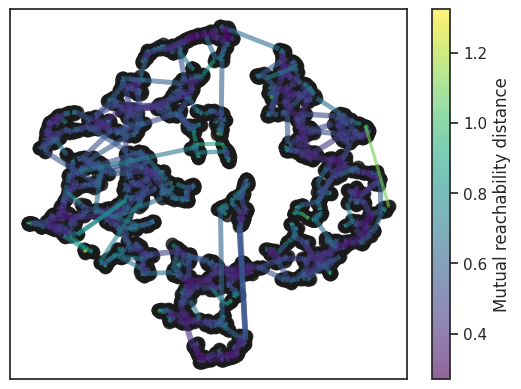

In [46]:
clusterer.minimum_spanning_tree_.plot(edge_cmap='viridis',
                                      edge_alpha=0.6,
                                      node_size=80,
                                      edge_linewidth=2)


### Build the cluster hierarchy 

<Axes: ylabel='distance'>

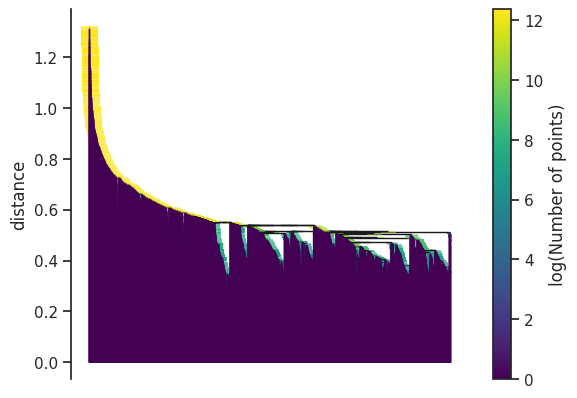

In [47]:
clusterer.single_linkage_tree_.plot(cmap='viridis', colorbar=True)

### Extract the clusters

<Axes: ylabel='$\\lambda$ value'>

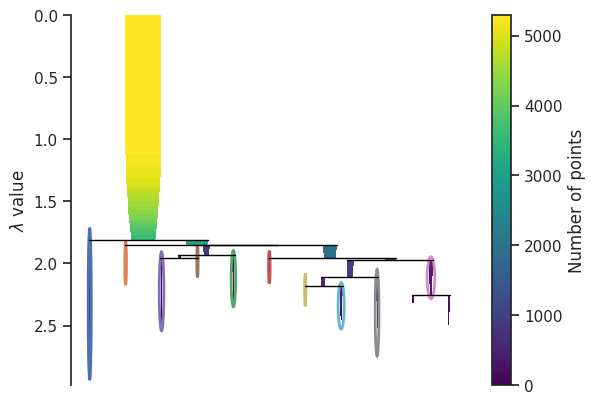

In [48]:
clusterer.condensed_tree_.plot(select_clusters=True, selection_palette=sns.color_palette())

Plting the components

<Axes: xlabel='PC1', ylabel='PC2'>

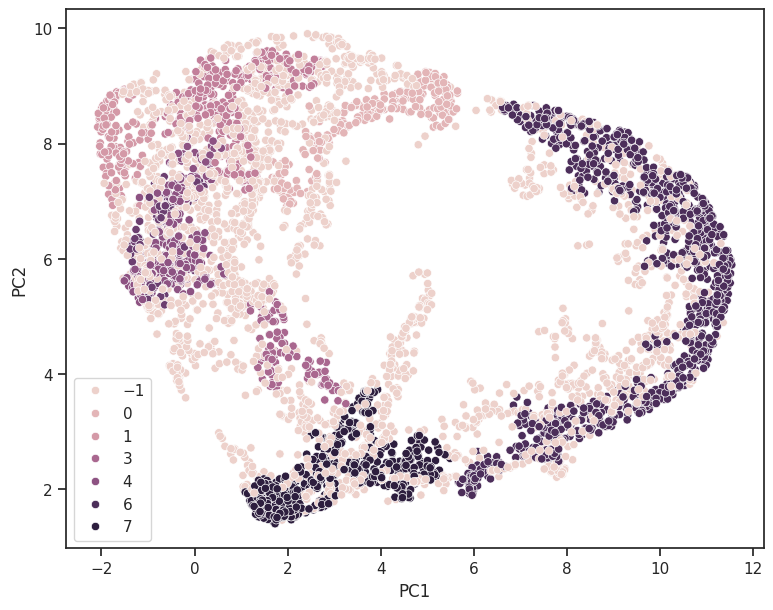

In [49]:
plt.figure(figsize=(9,7))
sns.scatterplot(x=umap_df["PC1"], y=umap_df["PC2"], 
                hue=labels,
                )

By resetting the indexes with reset_index(drop=True), you ensure that each DataFrame's index starts from 0, effectively aligning the rows properly for concatenation. Then you can concatenate them horizontally without encountering issues due to mismatched indexes.

In [50]:
# Concatenat the original claen table with the umap results
df_filtered.reset_index(drop=True, inplace=True)
umap_df.reset_index(drop=True, inplace=True)
df_cleanErr_umap = pd.concat([df_filtered, umap_df], axis=1)

Create the tables for each clase

In [51]:
df_cleanErr_umap["Label"] = labels

In [52]:
df_cleanErr_umap

,Name,RAJ2000,DEJ2000,GLON,GLAT,SourceID,ePos,Class,pStar,pGalaxy,...,pmRA,e_pmRA,pmDE,e_pmDE,d2M,angDist,PC1,PC2,PC3,Label
0,J194407.42+302330.8,296.030917,30.391885,65.664704,3.196313,470950-3-22952,0.033,-1.0,1.00,0.00,...,-83.0,104.0,-153.0,110.0,0.071,0.196844,1.484631,1.568673,4.605864,7
1,J193737.05+291841.3,294.404389,29.311475,64.027520,3.894285,420815-3-7132,0.044,-1.0,1.00,0.00,...,NaN,NaN,NaN,NaN,0.303,0.296750,6.588462,2.380211,2.946511,-1
2,J193422.27+291439.8,293.592782,29.244383,63.625692,4.481705,420083-3-17125,0.043,99.0,0.00,1.00,...,NaN,NaN,NaN,NaN,0.367,0.259146,5.995028,1.982311,2.129001,6
3,J194006.65+300124.9,295.027722,30.023586,64.915346,3.768859,455814-3-6029,0.048,99.0,1.00,0.00,...,-910.0,246.0,550.0,249.0,0.595,0.594496,3.938901,3.128682,1.434969,-1
4,J193331.61+300620.6,293.381688,30.105718,64.296195,5.055353,419728-3-12944,0.037,99.0,0.95,0.05,...,NaN,NaN,NaN,NaN,0.306,0.327454,7.532573,2.549290,1.110527,-1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5286,J194657.47+291706.8,296.739465,29.285215,65.012424,2.111001,626263-3-22491,0.026,-1.0,1.00,0.00,...,-192.0,138.0,-15.0,114.0,0.691,0.675858,7.244022,2.662669,3.180351,-1
5287,J194631.32+291451.9,296.630484,29.247751,64.932234,2.174407,364539-1-2795,0.031,-1.0,1.00,0.00,...,-358.0,70.0,101.0,71.0,0.052,0.108804,1.609970,5.303512,4.785073,-1
5288,J194725.96+293304.7,296.858158,29.551299,65.294604,2.155432,398934-4-24535,0.038,-1.0,1.00,0.00,...,68.0,111.0,87.0,114.0,0.132,0.078484,7.759397,2.809652,2.930034,-1
5289,J194912.66+294740.1,297.302738,29.794486,65.699773,1.944719,534182-1-4440,0.018,-1.0,1.00,0.00,...,8.0,60.0,-83.0,58.0,0.323,0.274081,6.709561,3.818258,1.374864,-1


**Preliminary conlusions**\\
Wiht the parameters recomended by the Silhouette HDBSCAM fin two group, on which one corresponds to the EB. BUt using (min_samples=5, min_cluster_size=60 HDBCAM find four group one coressponds to to the EB, aother to CV and QSOS and AGN, and the other two to QSOS each one corresnp a specific redshift.

In [53]:
# Group the data based on the "Label" column
grouped_data = df_cleanErr_umap.groupby("Label")

In [54]:
# Define the directory where you want to save the CSV files
directory = '../Class_wise_v5/'

In [55]:
# Iterate over each group
for label, group_df in grouped_data:
    if label == -1:  # Noise points
        filename = f'Halpha_emitter_wise_noise.csv'
    else:
        filename = f'Halpha_emitter_wise_group{label}.csv'
    group_df.to_csv(directory + filename, index=False)